!pip install glob2 
!pip install mne
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install h5py
!pip install keras
!pip install tensorflow
!pip install os-sys
!pip install PyWavelets
!pip install scikit-image
!pip install pytest-warnings

In [1]:
import glob
import mne
from mne.preprocessing import ICA, EOGRegression
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from preprocessing import preprocessing, readEpochDenoise
from patient_data import patient_data
from Hjorths import hjorths, getFeaturesIntoDataframe
from ML import ML, get_ML_Results, highlight_max_clr, highlight_max_acc, plotCM
from DL import EEGNet

## Pre-processing
### Splitting the features of Raw EEG data and assigning them to their correct subject group.

In [3]:
data_path = glob.glob('Raw/*.set')
DLB      = [i for i in data_path if 'DLB' in i.split('\\')[1]]
AD     = [i for i in data_path if 'F001' in i.split('\\')[1]]
PDD     = [i for i in data_path if 'F023' in i.split('\\')[1]]
PD      = [i for i in data_path if 'G20' in i.split('\\')[1]]
HC = [i for i in data_path if 'Kontroll' in i.split('\\')[1]]

print(len(DLB), len(AD), len(PDD), len(PD), len(HC))

16 19 13 15 21


### In this section the RAW EEG data for each subject group have been read, pre-processed and saved into a file.

In [4]:
# read, clean, and epoch all the data
cleaned_data = readEpochDenoise(DLB, AD, PDD, PD, HC,  apply_wavelet = False, apply_notch = False)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


695 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 695 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
1 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.7s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
727 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 727 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Settin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
773 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 773 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
717 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 717 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 9.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
711 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 711 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Fp1']
1 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
696 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 696 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Fi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.7s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
673 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 673 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
703 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 703 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
709 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 709 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 8.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 707 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'Fp1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'Fp1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'Fp1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'Fp1']
9 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 8.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
709 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 709 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.7s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
1022 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1022 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


1 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
4 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
685 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 685 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
1 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.5

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
519 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 519 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
669 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 669 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 14.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
701 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 701 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp2']
    Re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
709 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 709 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8', 'Fp1', 'Fp2', 'F3', 'F4']
    Rejecting  epoch based on EEG : ['T8', 'Fp1', 'Fp2', 'F3']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['T8', 'C4']
    Rejecting  epoch based on EEG : ['T8', 'C4']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'C4']
    Rejecting  epoch based on EEG : ['T8', 'C4']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejectin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
706 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 706 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
697 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 697 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
733 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 733 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EE

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Settin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
702 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 702 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 9.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
663 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 663 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
725 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 725 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['T8', 'Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
18 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR fil

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
709 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 709 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Fp2']
3 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 8.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
711 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 711 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 714 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.1s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Settin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 704 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Fi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 708 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
6 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
731 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 731 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.7s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
716 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 716 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
1 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
766 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 766 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
660 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 660 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.7s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Settin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
713 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 713 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'F3']
    Rejecting  epoch based on EEG : ['T7', 'F3']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'Fp1', 'F3']
9 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 11.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 6

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
657 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 657 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.1s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished



Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 704 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Settin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 704 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
6 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
636 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 636 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 11.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
697 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 697 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 9.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
738 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 738 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
681 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 681 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Fi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
706 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 706 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
677 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 677 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transitio

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 30

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
515 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 515 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 30

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
506 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 506 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 3.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
719 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 719 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Settin

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
686 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 686 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished



Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
710 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 710 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F3']
10 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidt

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 3.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
625 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 625 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
2 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
701 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 701 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
703 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 703 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 708 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 707 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 3.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
714 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 714 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
695 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 695 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['O1']
1 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 3.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
518 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 518 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.1s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
706 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 706 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 5 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 704 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 707 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
6 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.019

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.7s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished



FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Fi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 11.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P3', 'T8']
    Rejecting  epoch based on EEG : ['P3', 'T8']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P3', 'C3']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'Fp2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
14 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple an

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
701 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 701 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
2 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 707 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 704 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 708 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 21.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
706 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 706 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T7', 'Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'Fp1', 'Fp2']
2 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.5s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 704 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Cz', 'C4']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
5 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
698 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 698 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.6s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
707 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 707 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.1s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
694 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 694 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
703 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 703 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- F

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.3s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 708 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
7 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain de

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 9.2s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished



FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 0 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
4 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 7.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
-----------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 704 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 3.4s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
703 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 703 events and 481 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 6.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
703 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 703 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7']
2 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 5.8s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
715 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 715 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 17.0s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwa

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 2 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
711 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 711 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T8', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
4 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- L

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.1s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forwar

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
702 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 702 events and 481 original time points ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1981 samples (6.603 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Fitting ICA to data using 14 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished


Selecting by non-zero PCA components: 13 components
Fitting ICA took 4.9s.
Using EOG channel: V-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished


Using EOG channel: H-EOG
... filtering ICA sources
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


... filtering target
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)
- Filter length: 3000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 3 ICA components
    Projecting back using 14 PCA components
Used Annotations descriptions: ['1', '10', '2', '3']
Not setting metadata
705 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 705 events and 481 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)
0 bad epochs dropped


In [5]:
# save the data belonging to the standard stimuli into a file with the same name
cleaned_data.save_data(standard = True , target = False, distractor = False, 
                     reaction_time = False, all_stimuli = False)

In [6]:
# save the data belonging to the target stimuli into file with the same name
cleaned_data.save_data(standard = False , target = True, distractor = False, 
                     reaction_time = False, all_stimuli = False)

In [7]:
# save the data belonging to the distractor stimuli into file with the same name
cleaned_data.save_data(standard = False , target = False, distractor = True, 
                     reaction_time = False, all_stimuli = False)

In [8]:
# save the data belonging to the reaction_time into file with the same name
cleaned_data.save_data(standard = False, target = False, distractor = False, 
                     reaction_time = True, all_stimuli = False)

In [9]:
# save the data belonging to the all stimuli into file with the same name
cleaned_data.save_data(standard = False , target = False, distractor = False, 
                     reaction_time = False, all_stimuli = True)

## Load preprocessed data

In [10]:
# Standard epochs ica-cleaned
DLB_Standard  = np.load('preprocessed_data/Standard_DLB.npy', allow_pickle=True)
AD_Standard   = np.load('preprocessed_data/Standard_AD.npy', allow_pickle=True)
PDD_Standard  = np.load('preprocessed_data/Standard_PDD.npy', allow_pickle=True)
PD_Standard   = np.load('preprocessed_data/Standard_PD.npy', allow_pickle=True)
HC_Standard   = np.load('preprocessed_data/Standard_HC.npy', allow_pickle=True)
print(DLB_Standard.shape, AD_Standard.shape, PDD_Standard.shape, 
      PD_Standard.shape, HC_Standard.shape)

(16, 300, 9, 205) (19, 300, 9, 205) (13, 300, 9, 205) (15, 300, 9, 205) (21, 300, 9, 205)


In [11]:
# target epochs 
DLB_Target  = np.load('preprocessed_data/Target_DLB.npy', allow_pickle=True)
AD_Target   = np.load('preprocessed_data/Target_AD.npy', allow_pickle=True)
PDD_Target  = np.load('preprocessed_data/Target_PDD.npy', allow_pickle=True)
PD_Target   = np.load('preprocessed_data/Target_PD.npy', allow_pickle=True)
HC_Target   = np.load('preprocessed_data/Target_HC.npy', allow_pickle=True)
print(DLB_Target.shape, AD_Target.shape, PDD_Target.shape, PD_Target.shape, HC_Target.shape)

(16,) (19,) (13,) (15,) (21, 75, 9, 205)


In [12]:
# distractor epochs
DLB_Distractor  = np.load('preprocessed_data/Distractor_DLB.npy', allow_pickle=True)
AD_Distractor   = np.load('preprocessed_data/Distractor_AD.npy', allow_pickle=True)
PDD_Distractor  = np.load('preprocessed_data/Distractor_PDD.npy', allow_pickle=True)
PD_Distractor   = np.load('preprocessed_data/Distractor_PD.npy', allow_pickle=True)
HC_Distractor   = np.load('preprocessed_data/Distractor_HC.npy', allow_pickle=True)
print(DLB_Distractor.shape, AD_Distractor.shape, PDD_Distractor.shape, PD_Distractor.shape, HC_Distractor.shape)

(16,) (19,) (13,) (15,) (21, 75, 9, 205)


## Compute Hjorth's parameters

In [13]:
# compute Hjorth's parameters for standard epochs
DLB_HP_Standard = hjorths(DLB_Standard, average = False) # DLB
AD_HP_Standard  = hjorths(AD_Standard, average = False) # AD
PDD_HP_Standard = hjorths(PDD_Standard, average = False) # PD
PD_HP_Standard  = hjorths(PD_Standard, average = False) # PDD
HC_HP_Standard  = hjorths(HC_Standard, average = False) # HC

In [14]:
# compute Hjorth's parameters for target epochs
DLB_HP_Target = hjorths(DLB_Target, average = False) # DLB
AD_HP_Target  = hjorths(AD_Target, average = False) # AD
PDD_HP_Target = hjorths(PDD_Target, average = False) # PD
PD_HP_Target  = hjorths(PD_Target, average = False) # PDD
HC_HP_Target  = hjorths(HC_Target, average = False) # HC

In [15]:
# compute Hjorth's parameters for distractor epochs
DLB_HP_Distractor = hjorths(DLB_Distractor, average = False) # DLB 
AD_HP_Distractor  = hjorths(AD_Distractor, average = False)  # AD
PDD_HP_Distractor = hjorths(PDD_Distractor, average = False) # PD 
PD_HP_Distractor  = hjorths(PD_Distractor, average = False)  # PDD
HC_HP_Distractor  = hjorths(HC_Distractor, average = False) # HC

## Classification results for traditional MACHINE LEARNING CLASSIFIERS

In [16]:
Results = get_ML_Results(DLB_Standard = DLB_HP_Standard, AD_Standard = AD_HP_Standard, 
                         PDD_Standard = PDD_HP_Standard, PD_Standard = PD_HP_Standard, 
                         HC_Standard = HC_HP_Standard,
                         DLB_Target = DLB_HP_Target, AD_Target = AD_HP_Target, 
                         PDD_Target = PDD_HP_Target, PD_Target = PD_HP_Target,
                         HC_Target = HC_HP_Target,
                         DLB_Distractor = DLB_HP_Distractor, AD_Distractor = AD_HP_Distractor,
                         PDD_Distractor = PDD_HP_Distractor, PD_Distractor = PD_HP_Distractor,
                         HC_Distractor =  HC_HP_Distractor)

### Highlighed best performance classifiers based on the f1-score, precision and recall for activity feature of standard stimuli.

In [17]:
results_Standard = highlight_max_clr( Results ,Standard = True, Target = False, Distractor = False)
df_clr_A = results_Standard.mean_std(input_feature = 'Activity')
#df_clr_A.to_latex('clr_A.tex')
df_clr_A

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.919 ( 0.04),0.916 ( 0.06),0.972 ( 0.01),0.913 ( 0.1),0.834 ( 0.11),RF
precision/Random Forest,0.932 ( 0.05),0.913 ( 0.1),0.971 ( 0.03),0.93 ( 0.11),0.823 ( 0.2),RF
recall/Random Forest,0.917 ( 0.1),0.926 ( 0.07),0.974 ( 0.03),0.911 ( 0.14),0.881 ( 0.11),RF
f1-score/Gradient Boosting,0.867 ( 0.1),0.861 ( 0.1),0.938 ( 0.06),0.876 ( 0.07),0.853 ( 0.07),GB
precision/Gradient Boosting,0.863 ( 0.16),0.827 ( 0.09),0.98 ( 0.03),0.915 ( 0.14),0.826 ( 0.16),GB
recall/Gradient Boosting,0.887 ( 0.1),0.898 ( 0.11),0.907 ( 0.11),0.863 ( 0.11),0.904 ( 0.06),GB
f1-score/KNN,0.859 ( 0.04),0.848 ( 0.07),0.946 ( 0.03),0.914 ( 0.07),0.817 ( 0.05),KNN
precision/KNN,0.846 ( 0.03),0.754 ( 0.1),0.983 ( 0.02),0.988 ( 0.03),0.89 ( 0.16),KNN
recall/KNN,0.876 ( 0.08),0.976 ( 0.04),0.912 ( 0.05),0.857 ( 0.13),0.778 ( 0.09),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for mobility feature of standard stimuli.

In [18]:
df_clr_M = results_Standard.mean_std(input_feature = 'Mobility')
#df_clr_M.to_latex('clr_M.tex')
df_clr_M

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.86 ( 0.07),0.875 ( 0.08),0.926 ( 0.02),0.88 ( 0.11),0.819 ( 0.21),RF
precision/Random Forest,0.837 ( 0.11),0.845 ( 0.07),0.931 ( 0.05),0.897 ( 0.07),0.882 ( 0.24),RF
recall/Random Forest,0.893 ( 0.07),0.909 ( 0.11),0.922 ( 0.02),0.874 ( 0.17),0.77 ( 0.2),RF
f1-score/Gradient Boosting,0.86 ( 0.03),0.836 ( 0.13),0.907 ( 0.04),0.858 ( 0.08),0.689 ( 0.4),GB
precision/Gradient Boosting,0.824 ( 0.11),0.83 ( 0.15),0.928 ( 0.06),0.871 ( 0.02),0.756 ( 0.42),GB
recall/Gradient Boosting,0.915 ( 0.07),0.854 ( 0.15),0.892 ( 0.07),0.854 ( 0.14),0.644 ( 0.39),GB
f1-score/KNN,0.859 ( 0.06),0.884 ( 0.1),0.895 ( 0.05),0.87 ( 0.08),0.771 ( 0.26),KNN
precision/KNN,0.791 ( 0.1),0.848 ( 0.11),0.918 ( 0.1),0.935 ( 0.04),0.883 ( 0.22),KNN
recall/KNN,0.95 ( 0.07),0.926 ( 0.09),0.877 ( 0.04),0.82 ( 0.13),0.696 ( 0.27),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for complexity feature of standard stimuli.

In [19]:
df_clr_C = results_Standard.mean_std(input_feature = 'Complexity')
#df_clr_C.to_latex('clr_C.tex')
df_clr_C

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.883 ( 0.04),0.887 ( 0.14),0.956 ( 0.03),0.888 ( 0.1),0.71 ( 0.17),RF
precision/Random Forest,0.88 ( 0.02),0.915 ( 0.05),0.934 ( 0.06),0.907 ( 0.08),0.762 ( 0.28),RF
recall/Random Forest,0.891 ( 0.08),0.891 ( 0.23),0.981 ( 0.02),0.874 ( 0.13),0.741 ( 0.14),RF
f1-score/Gradient Boosting,0.866 ( 0.06),0.876 ( 0.14),0.946 ( 0.04),0.855 ( 0.06),0.695 ( 0.17),GB
precision/Gradient Boosting,0.87 ( 0.08),0.907 ( 0.06),0.959 ( 0.05),0.856 ( 0.03),0.714 ( 0.29),GB
recall/Gradient Boosting,0.869 ( 0.08),0.861 ( 0.2),0.937 ( 0.07),0.861 ( 0.11),0.763 ( 0.08),GB
f1-score/KNN,0.863 ( 0.05),0.757 ( 0.22),0.892 ( 0.06),0.869 ( 0.1),0.605 ( 0.1),KNN
precision/KNN,0.824 ( 0.08),0.677 ( 0.19),0.844 ( 0.1),0.939 ( 0.06),0.93 ( 0.11),KNN
recall/KNN,0.915 ( 0.08),0.867 ( 0.28),0.948 ( 0.03),0.815 ( 0.14),0.467 ( 0.14),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for activity feature of target stimuli.

In [20]:
results_Target = highlight_max_clr( Results ,Standard = False, Target = True, Distractor = False)
clr_A_T = results_Target.mean_std(input_feature = 'Activity')
#clr_A_T.to_latex('clr_A_T.tex')
clr_A_T

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.724 ( 0.1),0.835 ( 0.12),0.933 ( 0.03),0.584 ( 0.16),0.708 ( 0.05),RF
precision/Random Forest,0.685 ( 0.15),0.839 ( 0.15),0.928 ( 0.07),0.634 ( 0.1),0.775 ( 0.18),RF
recall/Random Forest,0.783 ( 0.1),0.841 ( 0.13),0.943 ( 0.06),0.581 ( 0.25),0.681 ( 0.08),RF
f1-score/Gradient Boosting,0.748 ( 0.1),0.816 ( 0.09),0.919 ( 0.04),0.574 ( 0.15),0.709 ( 0.08),GB
precision/Gradient Boosting,0.742 ( 0.14),0.806 ( 0.13),0.912 ( 0.09),0.615 ( 0.04),0.753 ( 0.18),GB
recall/Gradient Boosting,0.776 ( 0.14),0.841 ( 0.11),0.933 ( 0.07),0.569 ( 0.25),0.726 ( 0.18),GB
f1-score/KNN,0.768 ( 0.09),0.834 ( 0.11),0.912 ( 0.05),0.661 ( 0.22),0.596 ( 0.16),KNN
precision/KNN,0.733 ( 0.1),0.799 ( 0.14),0.901 ( 0.1),0.716 ( 0.23),0.681 ( 0.23),KNN
recall/KNN,0.82 ( 0.13),0.878 ( 0.07),0.927 ( 0.02),0.639 ( 0.26),0.533 ( 0.12),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for mobility feature of target stimuli.

In [21]:
clr_M_T = results_Target.mean_std(input_feature = 'Mobility')
#clr_M_T.to_latex('clr_M_T.tex')
clr_M_T

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.766 ( 0.17),0.813 ( 0.05),0.772 ( 0.08),0.747 ( 0.14),0.789 ( 0.13),RF
precision/Random Forest,0.804 ( 0.13),0.856 ( 0.12),0.765 ( 0.13),0.773 ( 0.14),0.785 ( 0.23),RF
recall/Random Forest,0.781 ( 0.25),0.791 ( 0.1),0.795 ( 0.1),0.73 ( 0.16),0.867 ( 0.14),RF
f1-score/Gradient Boosting,0.8 ( 0.08),0.778 ( 0.05),0.773 ( 0.05),0.721 ( 0.11),0.746 ( 0.14),GB
precision/Gradient Boosting,0.839 ( 0.13),0.783 ( 0.09),0.782 ( 0.09),0.707 ( 0.13),0.752 ( 0.23),GB
recall/Gradient Boosting,0.78 ( 0.1),0.787 ( 0.1),0.77 ( 0.04),0.744 ( 0.12),0.8 ( 0.14),GB
f1-score/KNN,0.7 ( 0.14),0.827 ( 0.09),0.724 ( 0.08),0.71 ( 0.16),0.766 ( 0.14),KNN
precision/KNN,0.695 ( 0.12),0.846 ( 0.09),0.674 ( 0.11),0.745 ( 0.13),0.862 ( 0.18),KNN
recall/KNN,0.722 ( 0.2),0.813 ( 0.11),0.791 ( 0.08),0.683 ( 0.18),0.704 ( 0.15),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for complexity feature of target stimuli.

In [22]:
clr_C_T = results_Target.mean_std(input_feature = 'Complexity')
#clr_C_T.to_latex('clr_C_T.tex')
clr_C_T

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.921 ( 0.07),0.813 ( 0.19),0.865 ( 0.04),0.793 ( 0.09),0.545 ( 0.11),RF
precision/Random Forest,0.925 ( 0.07),0.825 ( 0.04),0.809 ( 0.07),0.796 ( 0.08),0.754 ( 0.28),RF
recall/Random Forest,0.924 ( 0.1),0.854 ( 0.29),0.933 ( 0.03),0.798 ( 0.13),0.526 ( 0.22),RF
f1-score/Gradient Boosting,0.889 ( 0.13),0.761 ( 0.19),0.846 ( 0.04),0.768 ( 0.09),0.637 ( 0.15),GB
precision/Gradient Boosting,0.969 ( 0.05),0.738 ( 0.1),0.806 ( 0.09),0.777 ( 0.08),0.784 ( 0.31),GB
recall/Gradient Boosting,0.844 ( 0.22),0.815 ( 0.27),0.9 ( 0.06),0.794 ( 0.2),0.637 ( 0.16),GB
f1-score/KNN,0.748 ( 0.15),0.764 ( 0.15),0.766 ( 0.07),0.776 ( 0.14),0.27 ( 0.19),KNN
precision/KNN,0.724 ( 0.12),0.703 ( 0.08),0.659 ( 0.1),0.912 ( 0.07),0.825 ( 0.39),KNN
recall/KNN,0.78 ( 0.19),0.852 ( 0.23),0.921 ( 0.03),0.702 ( 0.21),0.178 ( 0.13),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for activity feature of distractor stimuli.

In [23]:
results_Distractor = highlight_max_clr( Results ,Standard = False, Target = False, Distractor = True)
clr_A_D = results_Distractor.mean_std(input_feature = 'Activity')
#clr_A_D.to_latex('clr_A_D.tex')
clr_A_D

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.919 ( 0.08),0.84 ( 0.16),0.946 ( 0.05),0.777 ( 0.17),0.814 ( 0.1),RF
precision/Random Forest,0.911 ( 0.09),0.857 ( 0.16),0.954 ( 0.09),0.801 ( 0.16),0.803 ( 0.18),RF
recall/Random Forest,0.933 ( 0.11),0.831 ( 0.18),0.943 ( 0.04),0.794 ( 0.25),0.844 ( 0.04),RF
f1-score/Gradient Boosting,0.876 ( 0.1),0.839 ( 0.13),0.89 ( 0.03),0.752 ( 0.09),0.774 ( 0.08),GB
precision/Gradient Boosting,0.851 ( 0.13),0.889 ( 0.16),0.922 ( 0.1),0.758 ( 0.12),0.76 ( 0.16),GB
recall/Gradient Boosting,0.911 ( 0.1),0.796 ( 0.11),0.879 ( 0.12),0.794 ( 0.21),0.822 ( 0.15),GB
f1-score/KNN,0.871 ( 0.05),0.824 ( 0.09),0.922 ( 0.04),0.803 ( 0.2),0.805 ( 0.09),KNN
precision/KNN,0.847 ( 0.06),0.747 ( 0.14),0.963 ( 0.04),0.861 ( 0.13),0.883 ( 0.11),KNN
recall/KNN,0.896 ( 0.06),0.933 ( 0.06),0.889 ( 0.07),0.769 ( 0.25),0.763 ( 0.16),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for mobility feature of distractor stimuli.

In [24]:
clr_M_D = results_Distractor.mean_std(input_feature = 'Mobility')
#clr_M_D.to_latex('clr_M_D.tex')
clr_M_D

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.751 ( 0.13),0.689 ( 0.08),0.793 ( 0.06),0.823 ( 0.12),0.701 ( 0.27),RF
precision/Random Forest,0.743 ( 0.15),0.743 ( 0.17),0.773 ( 0.13),0.83 ( 0.13),0.757 ( 0.32),RF
recall/Random Forest,0.785 ( 0.19),0.652 ( 0.02),0.835 ( 0.09),0.828 ( 0.16),0.681 ( 0.25),RF
f1-score/Gradient Boosting,0.76 ( 0.04),0.69 ( 0.1),0.799 ( 0.07),0.8 ( 0.09),0.672 ( 0.2),GB
precision/Gradient Boosting,0.743 ( 0.09),0.724 ( 0.15),0.778 ( 0.11),0.82 ( 0.1),0.725 ( 0.27),GB
recall/Gradient Boosting,0.794 ( 0.11),0.663 ( 0.05),0.831 ( 0.09),0.793 ( 0.14),0.659 ( 0.19),GB
f1-score/KNN,0.725 ( 0.13),0.712 ( 0.17),0.807 ( 0.06),0.832 ( 0.1),0.592 ( 0.28),KNN
precision/KNN,0.659 ( 0.11),0.68 ( 0.2),0.862 ( 0.12),0.889 ( 0.12),0.675 ( 0.32),KNN
recall/KNN,0.819 ( 0.19),0.761 ( 0.17),0.767 ( 0.07),0.787 ( 0.12),0.533 ( 0.27),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for complexity feature of distractor stimuli.

In [25]:
clr_C_D = results_Distractor.mean_std(input_feature = 'Complexity')
#clr_C_D.to_latex('clr_C_D.tex')
clr_C_D

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.865 ( 0.04),0.714 ( 0.16),0.858 ( 0.05),0.806 ( 0.13),0.447 ( 0.12),RF
precision/Random Forest,0.85 ( 0.06),0.775 ( 0.07),0.779 ( 0.1),0.813 ( 0.17),0.611 ( 0.26),RF
recall/Random Forest,0.889 ( 0.09),0.687 ( 0.22),0.966 ( 0.03),0.813 ( 0.12),0.393 ( 0.05),RF
f1-score/Gradient Boosting,0.867 ( 0.06),0.65 ( 0.15),0.8 ( 0.08),0.747 ( 0.17),0.571 ( 0.12),GB
precision/Gradient Boosting,0.891 ( 0.08),0.656 ( 0.09),0.777 ( 0.15),0.768 ( 0.19),0.607 ( 0.2),GB
recall/Gradient Boosting,0.856 ( 0.12),0.667 ( 0.21),0.849 ( 0.12),0.737 ( 0.18),0.585 ( 0.05),GB
f1-score/KNN,0.828 ( 0.05),0.669 ( 0.16),0.774 ( 0.05),0.718 ( 0.13),0.188 ( 0.15),KNN
precision/KNN,0.775 ( 0.1),0.61 ( 0.14),0.686 ( 0.09),0.897 ( 0.14),0.408 ( 0.25),KNN
recall/KNN,0.904 ( 0.08),0.746 ( 0.19),0.9 ( 0.07),0.613 ( 0.15),0.126 ( 0.11),KNN


### Highlighed best performance classifier, and feature based on accuracy measure.

In [26]:
# compute accuracy resutls for the features of stimuli
res_acc = highlight_max_acc(Results)

### Highlighed best performance classifier by accuracy, using the features of STANDARD STIMULI

In [27]:
acc_S = res_acc.mean_std_accuracy(dataset = 'Standard')
#acc_S.to_latex('acc_S.tex')
acc_S

,Input Feature,Approach,Accuracy
0,Activity,Random Forest,0.92 ( 0.03)
1,Activity,Gradient Boosting,0.89 ( 0.04)
2,Activity,K-Nearest Neighbors,0.88 ( 0.03)
3,Mobility,Random Forest,0.89 ( 0.04)
4,Mobility,Gradient Boosting,0.86 ( 0.05)
5,Mobility,K-Nearest Neighbors,0.88 ( 0.04)
6,Complexity,Random Forest,0.88 ( 0.06)
7,Complexity,Gradient Boosting,0.86 ( 0.06)
8,Complexity,K-Nearest Neighbors,0.82 ( 0.07)


### Highlighed best performance classifier by accuracy, using the features of TARGET STIMULI

In [28]:
acc_T = res_acc.mean_std_accuracy(dataset = 'Target')
#acc_T.to_latex('acc_T.tex')
acc_T

,Input Feature,Approach,Accuracy
0,Activity,Random Forest,0.77 ( 0.05)
1,Activity,Gradient Boosting,0.77 ( 0.06)
2,Activity,K-Nearest Neighbors,0.78 ( 0.06)
3,Mobility,Random Forest,0.79 ( 0.06)
4,Mobility,Gradient Boosting,0.77 ( 0.04)
5,Mobility,K-Nearest Neighbors,0.75 ( 0.08)
6,Complexity,Random Forest,0.82 ( 0.05)
7,Complexity,Gradient Boosting,0.8 ( 0.08)
8,Complexity,K-Nearest Neighbors,0.72 ( 0.08)


### Highlighed best performance classifier by accuracy, using the features of DISTRACTOR STIMULI

In [29]:
acc_D = res_acc.mean_std_accuracy(dataset = 'Distractor')
#acc_D.to_latex('acc_D.tex')
acc_D

,Input Feature,Approach,Accuracy
0,Activity,Random Forest,0.88 ( 0.06)
1,Activity,Gradient Boosting,0.84 ( 0.04)
2,Activity,K-Nearest Neighbors,0.85 ( 0.07)
3,Mobility,Random Forest,0.77 ( 0.06)
4,Mobility,Gradient Boosting,0.76 ( 0.02)
5,Mobility,K-Nearest Neighbors,0.76 ( 0.06)
6,Complexity,Random Forest,0.78 ( 0.05)
7,Complexity,Gradient Boosting,0.75 ( 0.04)
8,Complexity,K-Nearest Neighbors,0.7 ( 0.04)


### Plot confusion matrices

In [30]:
plot_cm = plotCM(Results)

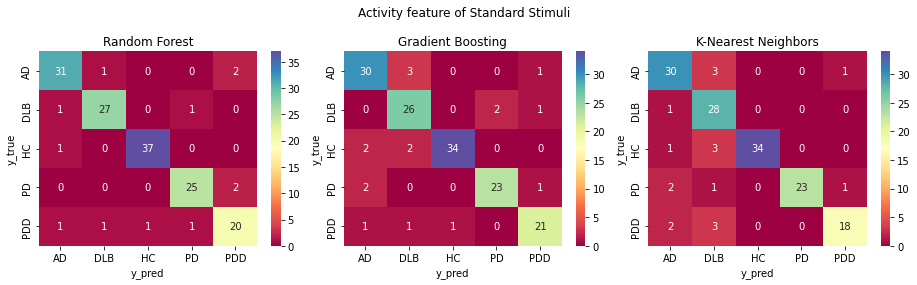

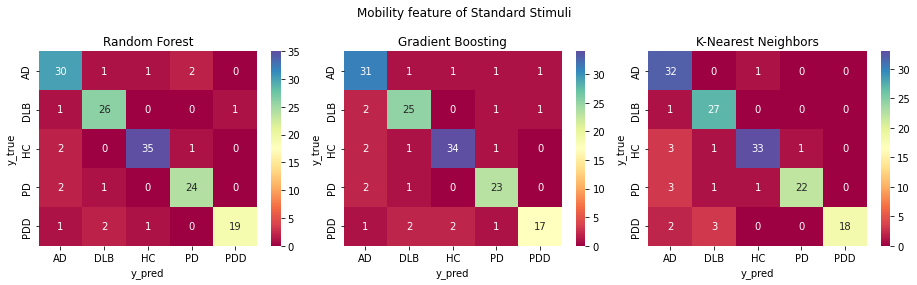

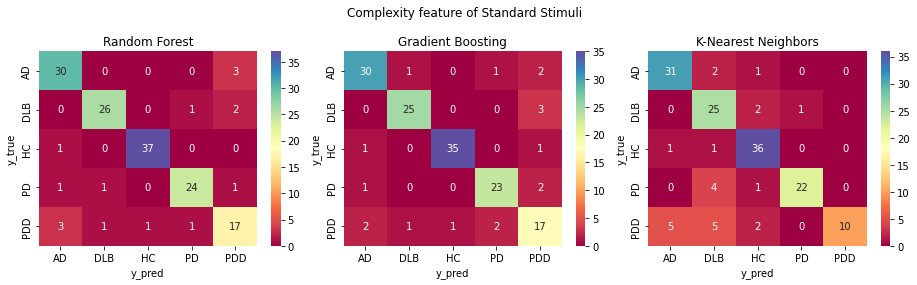

In [31]:
plot_cm.plot_CM_standard()

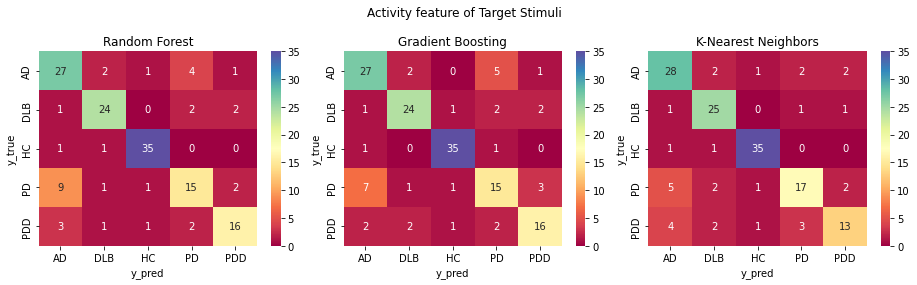

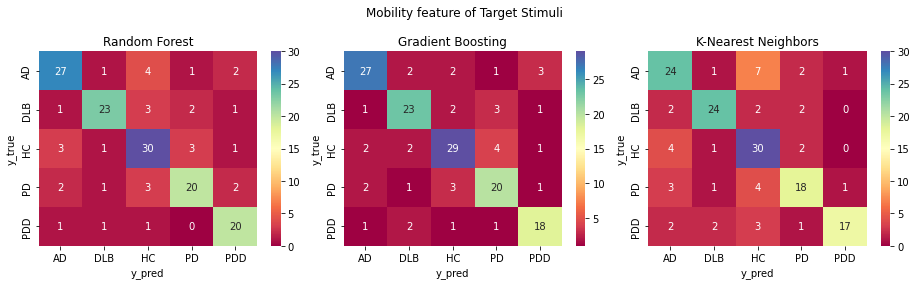

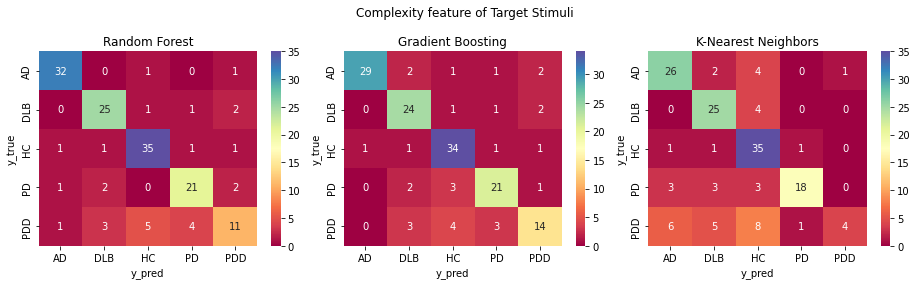

In [32]:
plot_cm.plot_CM_target()

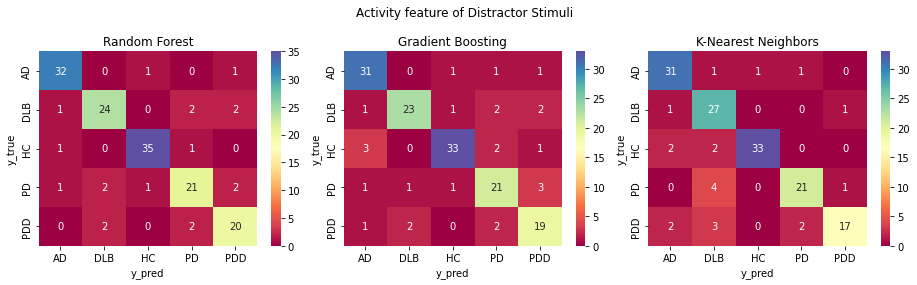

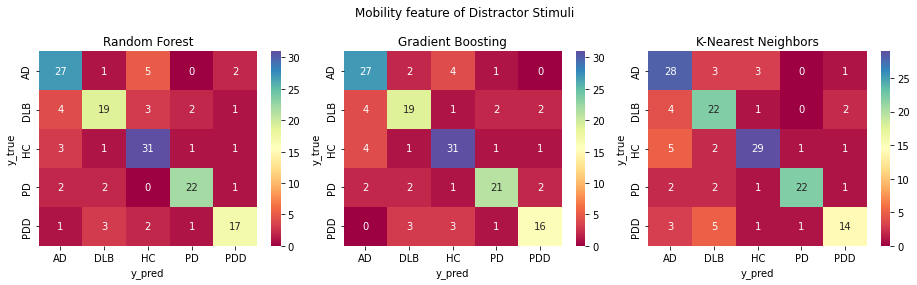

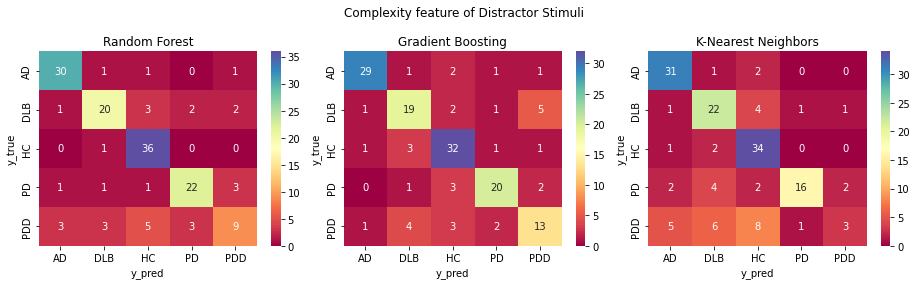

In [33]:
plot_cm.plot_CM_distractor()

# Classification results for EEGNet

In [34]:
CLF_S = EEGNet(DLB_Standard, AD_Standard, PDD_Standard, PD_Standard, HC_Standard )

Epoch 1/100
157/158 [============================>.] - ETA: 0s - loss: 1.6005 - accuracy: 0.2344
Epoch 1: val_accuracy improved from -inf to 0.31039, saving model to best_model.h5
158/158 [==============================] - 15s 88ms/step - loss: 1.6005 - accuracy: 0.2344 - val_loss: 1.5884 - val_accuracy: 0.3104
Epoch 2/100
157/158 [============================>.] - ETA: 0s - loss: 1.5129 - accuracy: 0.3641
Epoch 2: val_accuracy improved from 0.31039 to 0.32941, saving model to best_model.h5
158/158 [==============================] - 14s 91ms/step - loss: 1.5129 - accuracy: 0.3640 - val_loss: 1.4477 - val_accuracy: 0.3294
Epoch 3/100
157/158 [============================>.] - ETA: 0s - loss: 1.4065 - accuracy: 0.4060
Epoch 3: val_accuracy improved from 0.32941 to 0.37569, saving model to best_model.h5
158/158 [==============================] - 15s 92ms/step - loss: 1.4066 - accuracy: 0.4060 - val_loss: 1.3837 - val_accuracy: 0.3757
Epoch 4/100
157/158 [============================>.] - 

157/158 [============================>.] - ETA: 0s - loss: 1.2950 - accuracy: 0.4569
Epoch 8: val_accuracy improved from 0.45667 to 0.48392, saving model to best_model.h5
158/158 [==============================] - 17s 105ms/step - loss: 1.2951 - accuracy: 0.4569 - val_loss: 1.3024 - val_accuracy: 0.4839
Epoch 9/100
157/158 [============================>.] - ETA: 0s - loss: 1.2761 - accuracy: 0.4680
Epoch 9: val_accuracy improved from 0.48392 to 0.48882, saving model to best_model.h5
158/158 [==============================] - 16s 104ms/step - loss: 1.2761 - accuracy: 0.4680 - val_loss: 1.3059 - val_accuracy: 0.4888
Epoch 10/100
157/158 [============================>.] - ETA: 0s - loss: 1.2603 - accuracy: 0.4788
Epoch 10: val_accuracy improved from 0.48882 to 0.49000, saving model to best_model.h5
158/158 [==============================] - 17s 105ms/step - loss: 1.2604 - accuracy: 0.4788 - val_loss: 1.3079 - val_accuracy: 0.4900
Epoch 11/100
157/158 [============================>.] - ETA

157/158 [============================>.] - ETA: 0s - loss: 1.1194 - accuracy: 0.5423
Epoch 35: val_accuracy improved from 0.55235 to 0.56098, saving model to best_model.h5
158/158 [==============================] - 17s 106ms/step - loss: 1.1195 - accuracy: 0.5423 - val_loss: 1.1858 - val_accuracy: 0.5610
Epoch 36/100
157/158 [============================>.] - ETA: 0s - loss: 1.1167 - accuracy: 0.5437
Epoch 36: val_accuracy did not improve from 0.56098
158/158 [==============================] - 18s 112ms/step - loss: 1.1166 - accuracy: 0.5438 - val_loss: 1.1882 - val_accuracy: 0.5561
Epoch 37/100
157/158 [============================>.] - ETA: 0s - loss: 1.1175 - accuracy: 0.5478
Epoch 37: val_accuracy did not improve from 0.56098
158/158 [==============================] - 18s 116ms/step - loss: 1.1176 - accuracy: 0.5477 - val_loss: 1.1883 - val_accuracy: 0.5469
Epoch 38/100
157/158 [============================>.] - ETA: 0s - loss: 1.1170 - accuracy: 0.5422
Epoch 38: val_accuracy did n

Epoch 13/100
157/158 [============================>.] - ETA: 0s - loss: 1.1791 - accuracy: 0.5204
Epoch 13: val_accuracy did not improve from 0.31510
158/158 [==============================] - 16s 103ms/step - loss: 1.1792 - accuracy: 0.5204 - val_loss: 1.4990 - val_accuracy: 0.3147
Epoch 14/100
157/158 [============================>.] - ETA: 0s - loss: 1.1745 - accuracy: 0.5219
Epoch 14: val_accuracy improved from 0.31510 to 0.32510, saving model to best_model.h5
158/158 [==============================] - 18s 111ms/step - loss: 1.1744 - accuracy: 0.5219 - val_loss: 1.5126 - val_accuracy: 0.3251
Epoch 15/100
157/158 [============================>.] - ETA: 0s - loss: 1.1720 - accuracy: 0.5215
Epoch 15: val_accuracy did not improve from 0.32510
158/158 [==============================] - 17s 105ms/step - loss: 1.1721 - accuracy: 0.5215 - val_loss: 1.5054 - val_accuracy: 0.3161
Epoch 16/100
157/158 [============================>.] - ETA: 0s - loss: 1.1626 - accuracy: 0.5293
Epoch 16: val_a

157/158 [============================>.] - ETA: 0s - loss: 1.2788 - accuracy: 0.4637
Epoch 5: val_accuracy improved from 0.36765 to 0.37431, saving model to best_model.h5
158/158 [==============================] - 21s 134ms/step - loss: 1.2789 - accuracy: 0.4637 - val_loss: 1.3661 - val_accuracy: 0.3743
Epoch 6/100
157/158 [============================>.] - ETA: 0s - loss: 1.2528 - accuracy: 0.4801
Epoch 6: val_accuracy did not improve from 0.37431
158/158 [==============================] - 20s 126ms/step - loss: 1.2528 - accuracy: 0.4801 - val_loss: 1.3623 - val_accuracy: 0.3741
Epoch 7/100
157/158 [============================>.] - ETA: 0s - loss: 1.2419 - accuracy: 0.4882
Epoch 7: val_accuracy improved from 0.37431 to 0.38549, saving model to best_model.h5
158/158 [==============================] - 21s 132ms/step - loss: 1.2420 - accuracy: 0.4882 - val_loss: 1.3541 - val_accuracy: 0.3855
Epoch 8/100
157/158 [============================>.] - ETA: 0s - loss: 1.2300 - accuracy: 0.4970

150/150 [==============================] - 2s 11ms/step - loss: 1.3681 - accuracy: 0.3671


In [35]:
CLF_T = EEGNet(DLB_Target , AD_Target, PDD_Target, PD_Target, HC_Target )

Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.6164 - accuracy: 0.2114
Epoch 1: val_accuracy improved from -inf to 0.25873, saving model to best_model.h5
39/39 [==============================] - 7s 137ms/step - loss: 1.6164 - accuracy: 0.2114 - val_loss: 1.6072 - val_accuracy: 0.2587
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 1.5947 - accuracy: 0.2532
Epoch 2: val_accuracy improved from 0.25873 to 0.28810, saving model to best_model.h5
39/39 [==============================] - 5s 118ms/step - loss: 1.5947 - accuracy: 0.2532 - val_loss: 1.6016 - val_accuracy: 0.2881
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.5791 - accuracy: 0.2815
Epoch 3: val_accuracy improved from 0.28810 to 0.33095, saving model to best_model.h5
39/39 [==============================] - 5s 124ms/step - loss: 1.5791 - accuracy: 0.2815 - val_loss: 1.5911 - val_accuracy: 0.3310
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss

Epoch 7/100
39/39 [==============================] - ETA: 0s - loss: 1.4554 - accuracy: 0.3935
Epoch 7: val_accuracy improved from 0.31792 to 0.34388, saving model to best_model.h5
39/39 [==============================] - 5s 121ms/step - loss: 1.4554 - accuracy: 0.3935 - val_loss: 1.5188 - val_accuracy: 0.3439
Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 1.4325 - accuracy: 0.4025
Epoch 8: val_accuracy improved from 0.34388 to 0.35199, saving model to best_model.h5
39/39 [==============================] - 5s 122ms/step - loss: 1.4325 - accuracy: 0.4025 - val_loss: 1.5072 - val_accuracy: 0.3520
Epoch 9/100
39/39 [==============================] - ETA: 0s - loss: 1.4136 - accuracy: 0.4082
Epoch 9: val_accuracy improved from 0.35199 to 0.35442, saving model to best_model.h5
39/39 [==============================] - 5s 130ms/step - loss: 1.4136 - accuracy: 0.4082 - val_loss: 1.5061 - val_accuracy: 0.3544
Epoch 10/100
39/39 [==============================] - ETA: 0s - 

39/39 [==============================] - ETA: 0s - loss: 1.2981 - accuracy: 0.4573
Epoch 34: val_accuracy did not improve from 0.41525
39/39 [==============================] - 5s 116ms/step - loss: 1.2981 - accuracy: 0.4573 - val_loss: 1.4540 - val_accuracy: 0.4104
Epoch 35/100
39/39 [==============================] - ETA: 0s - loss: 1.2944 - accuracy: 0.4510
Epoch 35: val_accuracy did not improve from 0.41525
39/39 [==============================] - 5s 122ms/step - loss: 1.2944 - accuracy: 0.4510 - val_loss: 1.4570 - val_accuracy: 0.4096
Epoch 36/100
39/39 [==============================] - ETA: 0s - loss: 1.2939 - accuracy: 0.4534
Epoch 36: val_accuracy did not improve from 0.41525
39/39 [==============================] - 5s 125ms/step - loss: 1.2939 - accuracy: 0.4534 - val_loss: 1.4486 - val_accuracy: 0.4120
Epoch 37/100
39/39 [==============================] - ETA: 0s - loss: 1.2879 - accuracy: 0.4621
Epoch 37: val_accuracy did not improve from 0.41525
39/39 [=====================

39/39 [==============================] - ETA: 0s - loss: 1.2238 - accuracy: 0.4908
Epoch 62: val_accuracy did not improve from 0.48256
39/39 [==============================] - 5s 126ms/step - loss: 1.2238 - accuracy: 0.4908 - val_loss: 1.3337 - val_accuracy: 0.4655
Epoch 63/100
39/39 [==============================] - ETA: 0s - loss: 1.2129 - accuracy: 0.4908
Epoch 63: val_accuracy did not improve from 0.48256
39/39 [==============================] - 5s 117ms/step - loss: 1.2129 - accuracy: 0.4908 - val_loss: 1.3319 - val_accuracy: 0.4720
Epoch 64/100
39/39 [==============================] - ETA: 0s - loss: 1.2091 - accuracy: 0.4900
Epoch 64: val_accuracy did not improve from 0.48256
39/39 [==============================] - 4s 114ms/step - loss: 1.2091 - accuracy: 0.4900 - val_loss: 1.3344 - val_accuracy: 0.4672
Epoch 65/100
39/39 [==============================] - ETA: 0s - loss: 1.2021 - accuracy: 0.4993
Epoch 65: val_accuracy did not improve from 0.48256
39/39 [=====================

Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 1.5835 - accuracy: 0.2955
Epoch 4: val_accuracy improved from 0.29053 to 0.32103, saving model to best_model.h5
39/39 [==============================] - 5s 136ms/step - loss: 1.5835 - accuracy: 0.2955 - val_loss: 1.5865 - val_accuracy: 0.3210
Epoch 5/100
39/39 [==============================] - ETA: 0s - loss: 1.5691 - accuracy: 0.2977
Epoch 5: val_accuracy improved from 0.32103 to 0.33066, saving model to best_model.h5
39/39 [==============================] - 5s 132ms/step - loss: 1.5691 - accuracy: 0.2977 - val_loss: 1.5744 - val_accuracy: 0.3307
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 1.5512 - accuracy: 0.3242
Epoch 6: val_accuracy improved from 0.33066 to 0.33949, saving model to best_model.h5
39/39 [==============================] - 6s 145ms/step - loss: 1.5512 - accuracy: 0.3242 - val_loss: 1.5643 - val_accuracy: 0.3395
Epoch 7/100
39/39 [==============================] - ETA: 0s - l

39/39 [==============================] - 5s 134ms/step - loss: 1.2428 - accuracy: 0.4887 - val_loss: 1.3088 - val_accuracy: 0.4438
Epoch 32/100
39/39 [==============================] - ETA: 0s - loss: 1.2340 - accuracy: 0.4816
Epoch 32: val_accuracy did not improve from 0.45586
39/39 [==============================] - 5s 138ms/step - loss: 1.2340 - accuracy: 0.4816 - val_loss: 1.3048 - val_accuracy: 0.4486
Epoch 33/100
39/39 [==============================] - ETA: 0s - loss: 1.2353 - accuracy: 0.4955
Epoch 33: val_accuracy improved from 0.45586 to 0.45666, saving model to best_model.h5
39/39 [==============================] - 5s 127ms/step - loss: 1.2353 - accuracy: 0.4955 - val_loss: 1.3003 - val_accuracy: 0.4567
Epoch 34/100
39/39 [==============================] - ETA: 0s - loss: 1.2263 - accuracy: 0.4923
Epoch 34: val_accuracy improved from 0.45666 to 0.45907, saving model to best_model.h5
39/39 [==============================] - 5s 126ms/step - loss: 1.2263 - accuracy: 0.4923 - va

39/39 [==============================] - ETA: 0s - loss: 1.1773 - accuracy: 0.5140
Epoch 60: val_accuracy did not improve from 0.47191
39/39 [==============================] - 0s 12ms/step - loss: 1.2719 - accuracy: 0.4655
Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.6171 - accuracy: 0.2089
Epoch 1: val_accuracy improved from -inf to 0.29076, saving model to best_model.h5
39/39 [==============================] - 8s 164ms/step - loss: 1.6171 - accuracy: 0.2089 - val_loss: 1.6048 - val_accuracy: 0.2908
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 1.5971 - accuracy: 0.2486
Epoch 2: val_accuracy improved from 0.29076 to 0.32129, saving model to best_model.h5
39/39 [==============================] - 5s 127ms/step - loss: 1.5971 - accuracy: 0.2486 - val_loss: 1.5968 - val_accuracy: 0.3213
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.5830 - accuracy: 0.2693
Epoch 3: val_accuracy improved from 0.32129 to 0.35020, savin

39/39 [==============================] - ETA: 0s - loss: 1.3004 - accuracy: 0.4495
Epoch 27: val_accuracy did not improve from 0.48514
39/39 [==============================] - 5s 139ms/step - loss: 1.3004 - accuracy: 0.4495 - val_loss: 1.2843 - val_accuracy: 0.4851
Epoch 28/100
39/39 [==============================] - ETA: 0s - loss: 1.2852 - accuracy: 0.4643
Epoch 28: val_accuracy did not improve from 0.48514
39/39 [==============================] - 5s 135ms/step - loss: 1.2852 - accuracy: 0.4643 - val_loss: 1.2771 - val_accuracy: 0.4739
Epoch 29/100
39/39 [==============================] - ETA: 0s - loss: 1.2810 - accuracy: 0.4562
Epoch 29: val_accuracy did not improve from 0.48514
39/39 [==============================] - 5s 136ms/step - loss: 1.2810 - accuracy: 0.4562 - val_loss: 1.2795 - val_accuracy: 0.4787
Epoch 30/100
39/39 [==============================] - ETA: 0s - loss: 1.2827 - accuracy: 0.4523
Epoch 30: val_accuracy improved from 0.48514 to 0.48916, saving model to best_mo

Epoch 56/100
39/39 [==============================] - ETA: 0s - loss: 1.1952 - accuracy: 0.4952
Epoch 56: val_accuracy did not improve from 0.53494
39/39 [==============================] - 5s 121ms/step - loss: 1.1952 - accuracy: 0.4952 - val_loss: 1.2023 - val_accuracy: 0.5141
Epoch 57/100
39/39 [==============================] - ETA: 0s - loss: 1.1932 - accuracy: 0.5017
Epoch 57: val_accuracy did not improve from 0.53494
39/39 [==============================] - 4s 114ms/step - loss: 1.1932 - accuracy: 0.5017 - val_loss: 1.2089 - val_accuracy: 0.5044
Epoch 58/100
39/39 [==============================] - ETA: 0s - loss: 1.2013 - accuracy: 0.4936
Epoch 58: val_accuracy did not improve from 0.53494
39/39 [==============================] - 5s 130ms/step - loss: 1.2013 - accuracy: 0.4936 - val_loss: 1.2103 - val_accuracy: 0.5028
Epoch 59/100
39/39 [==============================] - ETA: 0s - loss: 1.1940 - accuracy: 0.4888
Epoch 59: val_accuracy did not improve from 0.53494
39/39 [========

In [36]:
CLF_D = EEGNet(DLB_Distractor , AD_Distractor, PDD_Distractor, PD_Distractor, HC_Distractor )

Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.6096 - accuracy: 0.2334
Epoch 1: val_accuracy improved from -inf to 0.25298, saving model to best_model.h5
39/39 [==============================] - 6s 126ms/step - loss: 1.6096 - accuracy: 0.2334 - val_loss: 1.6068 - val_accuracy: 0.2530
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 1.5891 - accuracy: 0.2832
Epoch 2: val_accuracy improved from 0.25298 to 0.27446, saving model to best_model.h5
39/39 [==============================] - 5s 122ms/step - loss: 1.5891 - accuracy: 0.2832 - val_loss: 1.6005 - val_accuracy: 0.2745
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.5599 - accuracy: 0.3378
Epoch 3: val_accuracy improved from 0.27446 to 0.28401, saving model to best_model.h5
39/39 [==============================] - 5s 130ms/step - loss: 1.5599 - accuracy: 0.3378 - val_loss: 1.5896 - val_accuracy: 0.2840
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss

Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.5747 - accuracy: 0.2888
Epoch 3: val_accuracy improved from 0.23169 to 0.23408, saving model to best_model.h5
39/39 [==============================] - 5s 140ms/step - loss: 1.5747 - accuracy: 0.2888 - val_loss: 1.6068 - val_accuracy: 0.2341
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 1.5539 - accuracy: 0.3247
Epoch 4: val_accuracy did not improve from 0.23408
39/39 [==============================] - 6s 145ms/step - loss: 1.5539 - accuracy: 0.3247 - val_loss: 1.6092 - val_accuracy: 0.2229
Epoch 5/100
39/39 [==============================] - ETA: 0s - loss: 1.5407 - accuracy: 0.3434
Epoch 5: val_accuracy did not improve from 0.23408
39/39 [==============================] - 5s 136ms/step - loss: 1.5407 - accuracy: 0.3434 - val_loss: 1.6118 - val_accuracy: 0.2277
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 1.5270 - accuracy: 0.3329
Epoch 6: val_accuracy improved from 0.2

Epoch 22/100
39/40 [============================>.] - ETA: 0s - loss: 1.2268 - accuracy: 0.4956
Epoch 22: val_accuracy improved from 0.42333 to 0.42667, saving model to best_model.h5
40/40 [==============================] - 5s 119ms/step - loss: 1.2265 - accuracy: 0.4961 - val_loss: 1.3832 - val_accuracy: 0.4267
Epoch 23/100
39/40 [============================>.] - ETA: 0s - loss: 1.2214 - accuracy: 0.5012
Epoch 23: val_accuracy did not improve from 0.42667
40/40 [==============================] - 4s 111ms/step - loss: 1.2209 - accuracy: 0.5013 - val_loss: 1.3832 - val_accuracy: 0.4233
Epoch 24/100
39/40 [============================>.] - ETA: 0s - loss: 1.2230 - accuracy: 0.5030
Epoch 24: val_accuracy did not improve from 0.42667
40/40 [==============================] - 5s 120ms/step - loss: 1.2233 - accuracy: 0.5025 - val_loss: 1.3911 - val_accuracy: 0.4217
Epoch 25/100
39/40 [============================>.] - ETA: 0s - loss: 1.2172 - accuracy: 0.5060
Epoch 25: val_accuracy did not i

40/40 [==============================] - 5s 122ms/step - loss: 1.1605 - accuracy: 0.5344 - val_loss: 1.3344 - val_accuracy: 0.4517
Epoch 51/100
39/40 [============================>.] - ETA: 0s - loss: 1.1608 - accuracy: 0.5236
Epoch 51: val_accuracy did not improve from 0.45417
40/40 [==============================] - 6s 140ms/step - loss: 1.1601 - accuracy: 0.5242 - val_loss: 1.3357 - val_accuracy: 0.4517
Epoch 52/100
39/40 [============================>.] - ETA: 0s - loss: 1.1536 - accuracy: 0.5321
Epoch 52: val_accuracy did not improve from 0.45417
40/40 [==============================] - 5s 129ms/step - loss: 1.1533 - accuracy: 0.5312 - val_loss: 1.3359 - val_accuracy: 0.4533
Epoch 53/100
39/40 [============================>.] - ETA: 0s - loss: 1.1592 - accuracy: 0.5278
Epoch 53: val_accuracy did not improve from 0.45417
40/40 [==============================] - 5s 135ms/step - loss: 1.1592 - accuracy: 0.5278 - val_loss: 1.3406 - val_accuracy: 0.4508
Epoch 54/100
39/40 [============

Epoch 23/100
39/39 [==============================] - ETA: 0s - loss: 1.2979 - accuracy: 0.4673
Epoch 23: val_accuracy improved from 0.41275 to 0.42072, saving model to best_model.h5
39/39 [==============================] - 5s 131ms/step - loss: 1.2979 - accuracy: 0.4673 - val_loss: 1.3874 - val_accuracy: 0.4207
Epoch 24/100
39/39 [==============================] - ETA: 0s - loss: 1.2920 - accuracy: 0.4651
Epoch 24: val_accuracy improved from 0.42072 to 0.42231, saving model to best_model.h5
39/39 [==============================] - 5s 119ms/step - loss: 1.2920 - accuracy: 0.4651 - val_loss: 1.3863 - val_accuracy: 0.4223
Epoch 25/100
39/39 [==============================] - ETA: 0s - loss: 1.2836 - accuracy: 0.4756
Epoch 25: val_accuracy did not improve from 0.42231
39/39 [==============================] - 5s 129ms/step - loss: 1.2836 - accuracy: 0.4756 - val_loss: 1.3927 - val_accuracy: 0.4183
Epoch 26/100
39/39 [==============================] - ETA: 0s - loss: 1.2795 - accuracy: 0.48

39/39 [==============================] - ETA: 0s - loss: 1.5263 - accuracy: 0.3406
Epoch 5: val_accuracy improved from 0.36969 to 0.42823, saving model to best_model.h5
39/39 [==============================] - 4s 111ms/step - loss: 1.5263 - accuracy: 0.3406 - val_loss: 1.5011 - val_accuracy: 0.4282
Epoch 6/100
39/39 [==============================] - ETA: 0s - loss: 1.4808 - accuracy: 0.3792
Epoch 6: val_accuracy improved from 0.42823 to 0.47554, saving model to best_model.h5
39/39 [==============================] - 4s 113ms/step - loss: 1.4808 - accuracy: 0.3792 - val_loss: 1.4307 - val_accuracy: 0.4755
Epoch 7/100
39/39 [==============================] - ETA: 0s - loss: 1.4388 - accuracy: 0.3905
Epoch 7: val_accuracy improved from 0.47554 to 0.49559, saving model to best_model.h5
39/39 [==============================] - 4s 106ms/step - loss: 1.4388 - accuracy: 0.3905 - val_loss: 1.3561 - val_accuracy: 0.4956
Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 1.4049 

Epoch 34/100
39/39 [==============================] - ETA: 0s - loss: 1.2341 - accuracy: 0.4783
Epoch 34: val_accuracy did not improve from 0.53007
39/39 [==============================] - 4s 108ms/step - loss: 1.2341 - accuracy: 0.4783 - val_loss: 1.1501 - val_accuracy: 0.5196
Epoch 35/100
39/39 [==============================] - ETA: 0s - loss: 1.2187 - accuracy: 0.4962
Epoch 35: val_accuracy did not improve from 0.53007
39/39 [==============================] - 4s 108ms/step - loss: 1.2187 - accuracy: 0.4962 - val_loss: 1.1527 - val_accuracy: 0.5180
Epoch 36/100
39/39 [==============================] - ETA: 0s - loss: 1.2240 - accuracy: 0.4964
Epoch 36: val_accuracy did not improve from 0.53007
39/39 [==============================] - 5s 124ms/step - loss: 1.2240 - accuracy: 0.4964 - val_loss: 1.1419 - val_accuracy: 0.5261
Epoch 37/100
39/39 [==============================] - ETA: 0s - loss: 1.2205 - accuracy: 0.4839
Epoch 37: val_accuracy improved from 0.53007 to 0.53649, saving mod

In [37]:
CLF_S_DLB_HC = EEGNet(DLB_Standard, None,None, None, HC_Standard )

Epoch 1/100
68/68 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.5237
Epoch 1: val_accuracy improved from -inf to 0.62583, saving model to best_model.h5
68/68 [==============================] - 12s 154ms/step - loss: 0.6914 - accuracy: 0.5237 - val_loss: 0.6836 - val_accuracy: 0.6258
Epoch 2/100
68/68 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.6062
Epoch 2: val_accuracy did not improve from 0.62583
68/68 [==============================] - 10s 141ms/step - loss: 0.6644 - accuracy: 0.6062 - val_loss: 0.6725 - val_accuracy: 0.6225
Epoch 3/100
68/68 [==============================] - ETA: 0s - loss: 0.6098 - accuracy: 0.6947
Epoch 3: val_accuracy did not improve from 0.62583
68/68 [==============================] - 11s 155ms/step - loss: 0.6098 - accuracy: 0.6947 - val_loss: 0.6632 - val_accuracy: 0.6158
Epoch 4/100
68/68 [==============================] - ETA: 0s - loss: 0.5475 - accuracy: 0.7363
Epoch 4: val_accuracy improved from 0.6

68/68 [==============================] - ETA: 0s - loss: 0.5072 - accuracy: 0.7620
Epoch 10: val_accuracy improved from 0.84750 to 0.85042, saving model to best_model.h5
68/68 [==============================] - 7s 101ms/step - loss: 0.5072 - accuracy: 0.7620 - val_loss: 0.3527 - val_accuracy: 0.8504
Epoch 11/100
68/68 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.7682
Epoch 11: val_accuracy did not improve from 0.85042
68/68 [==============================] - 7s 107ms/step - loss: 0.5020 - accuracy: 0.7682 - val_loss: 0.3494 - val_accuracy: 0.8504
Epoch 12/100
68/68 [==============================] - ETA: 0s - loss: 0.4979 - accuracy: 0.7676
Epoch 12: val_accuracy improved from 0.85042 to 0.85167, saving model to best_model.h5
68/68 [==============================] - 7s 99ms/step - loss: 0.4979 - accuracy: 0.7676 - val_loss: 0.3449 - val_accuracy: 0.8517
Epoch 13/100
68/68 [==============================] - ETA: 0s - loss: 0.4957 - accuracy: 0.7693
Epoch 13: v

71/71 [==============================] - 9s 125ms/step - loss: 0.4736 - accuracy: 0.7718 - val_loss: 0.3942 - val_accuracy: 0.8362
Epoch 17/100
70/71 [============================>.] - ETA: 0s - loss: 0.4729 - accuracy: 0.7770
Epoch 17: val_accuracy did not improve from 0.83619
71/71 [==============================] - 8s 118ms/step - loss: 0.4723 - accuracy: 0.7777 - val_loss: 0.4013 - val_accuracy: 0.8314
Epoch 18/100
70/71 [============================>.] - ETA: 0s - loss: 0.4677 - accuracy: 0.7777
Epoch 18: val_accuracy did not improve from 0.83619
71/71 [==============================] - 8s 114ms/step - loss: 0.4681 - accuracy: 0.7772 - val_loss: 0.3987 - val_accuracy: 0.8343
Epoch 19/100
70/71 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.7799
Epoch 19: val_accuracy improved from 0.83619 to 0.83667, saving model to best_model.h5
71/71 [==============================] - 8s 119ms/step - loss: 0.4654 - accuracy: 0.7800 - val_loss: 0.3993 - val_accuracy: 0.83

71/71 [==============================] - 14s 197ms/step - loss: 0.5533 - accuracy: 0.7388 - val_loss: 0.5483 - val_accuracy: 0.7486
Epoch 5/100
71/71 [==============================] - ETA: 0s - loss: 0.5274 - accuracy: 0.7516
Epoch 5: val_accuracy improved from 0.74857 to 0.75524, saving model to best_model.h5
71/71 [==============================] - 15s 209ms/step - loss: 0.5274 - accuracy: 0.7516 - val_loss: 0.5272 - val_accuracy: 0.7552
Epoch 6/100
70/71 [============================>.] - ETA: 0s - loss: 0.5079 - accuracy: 0.7624
Epoch 6: val_accuracy improved from 0.75524 to 0.76095, saving model to best_model.h5
71/71 [==============================] - 13s 185ms/step - loss: 0.5081 - accuracy: 0.7624 - val_loss: 0.5253 - val_accuracy: 0.7610
Epoch 7/100
71/71 [==============================] - ETA: 0s - loss: 0.4877 - accuracy: 0.7751
Epoch 7: val_accuracy improved from 0.76095 to 0.76333, saving model to best_model.h5
71/71 [==============================] - 11s 157ms/step - los

In [38]:
CLF_S_PD_HC = EEGNet(None, None,None, PD_Standard, HC_Standard )

Epoch 1/100
66/66 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5429
Epoch 1: val_accuracy improved from -inf to 0.50583, saving model to best_model.h5
66/66 [==============================] - 12s 151ms/step - loss: 0.6930 - accuracy: 0.5429 - val_loss: 0.6929 - val_accuracy: 0.5058
Epoch 2/100
66/66 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.6260
Epoch 2: val_accuracy improved from 0.50583 to 0.52542, saving model to best_model.h5
66/66 [==============================] - 9s 142ms/step - loss: 0.6683 - accuracy: 0.6260 - val_loss: 0.6788 - val_accuracy: 0.5254
Epoch 3/100
66/66 [==============================] - ETA: 0s - loss: 0.6052 - accuracy: 0.7131
Epoch 3: val_accuracy improved from 0.52542 to 0.78708, saving model to best_model.h5
66/66 [==============================] - 9s 139ms/step - loss: 0.6052 - accuracy: 0.7131 - val_loss: 0.5584 - val_accuracy: 0.7871
Epoch 4/100
66/66 [==============================] - ETA: 0s - los

Epoch 4/100
68/68 [==============================] - ETA: 0s - loss: 0.4820 - accuracy: 0.7882
Epoch 4: val_accuracy improved from 0.79095 to 0.81667, saving model to best_model.h5
68/68 [==============================] - 8s 123ms/step - loss: 0.4820 - accuracy: 0.7882 - val_loss: 0.4705 - val_accuracy: 0.8167
Epoch 5/100
68/68 [==============================] - ETA: 0s - loss: 0.4682 - accuracy: 0.7995
Epoch 5: val_accuracy improved from 0.81667 to 0.83286, saving model to best_model.h5
68/68 [==============================] - 8s 119ms/step - loss: 0.4682 - accuracy: 0.7995 - val_loss: 0.4416 - val_accuracy: 0.8329
Epoch 6/100
68/68 [==============================] - ETA: 0s - loss: 0.4622 - accuracy: 0.8023
Epoch 6: val_accuracy improved from 0.83286 to 0.83952, saving model to best_model.h5
68/68 [==============================] - 8s 122ms/step - loss: 0.4622 - accuracy: 0.8023 - val_loss: 0.4315 - val_accuracy: 0.8395
Epoch 7/100
68/68 [==============================] - ETA: 0s - l

Epoch 4/100
68/68 [==============================] - ETA: 0s - loss: 0.4666 - accuracy: 0.7983
Epoch 4: val_accuracy improved from 0.70048 to 0.73524, saving model to best_model.h5
68/68 [==============================] - 9s 134ms/step - loss: 0.4666 - accuracy: 0.7983 - val_loss: 0.6094 - val_accuracy: 0.7352
Epoch 5/100
68/68 [==============================] - ETA: 0s - loss: 0.4427 - accuracy: 0.8110
Epoch 5: val_accuracy improved from 0.73524 to 0.75333, saving model to best_model.h5
68/68 [==============================] - 11s 155ms/step - loss: 0.4427 - accuracy: 0.8110 - val_loss: 0.5957 - val_accuracy: 0.7533
Epoch 6/100
68/68 [==============================] - ETA: 0s - loss: 0.4307 - accuracy: 0.8202
Epoch 6: val_accuracy improved from 0.75333 to 0.76571, saving model to best_model.h5
68/68 [==============================] - 10s 140ms/step - loss: 0.4307 - accuracy: 0.8202 - val_loss: 0.5954 - val_accuracy: 0.7657
Epoch 7/100
68/68 [==============================] - ETA: 0s -

## Results for raw epochs of Standard Stimuli using all 5-subject groups

In [39]:
clr_D_S = CLF_S.mean_std_results()
clr_D_S.to_latex('clr_D_S.tex')
clr_D_S

,AD,DLB,HC,PD,PDD,Dataset
f1-score,0.411 ( 0.16),0.261 ( 0.03),0.548 ( 0.08),0.35 ( 0.14),0.352 ( 0.19),Standard
precision,0.565 ( 0.21),0.31 ( 0.05),0.456 ( 0.09),0.474 ( 0.34),0.418 ( 0.25),Standard
recall,0.335 ( 0.15),0.23 ( 0.03),0.722 ( 0.17),0.316 ( 0.1),0.356 ( 0.24),Standard


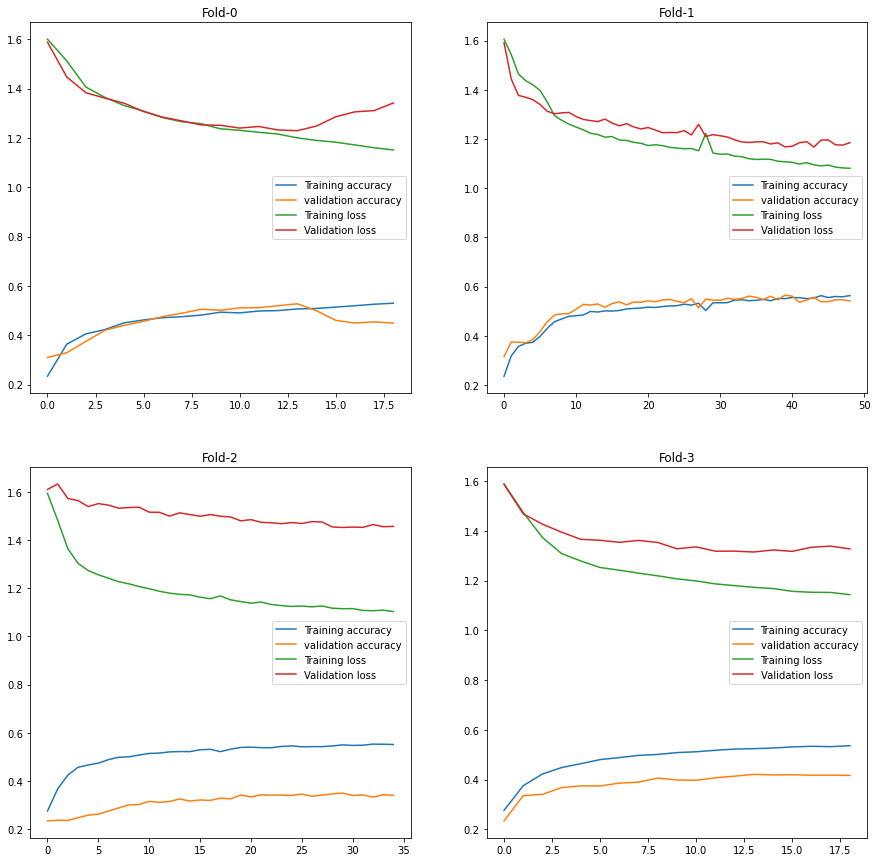

In [40]:
CLF_S.plots()

## Results for raw epochs of Target Stimuli using all 5-subject groups

In [41]:
clr_D_T = CLF_T.mean_std_results()
clr_D_T.to_latex('clr_D_T.tex')
clr_D_T

,AD,DLB,HC,PD,PDD,Dataset
f1-score,0.335 ( 0.23),0.172 ( 0.11),0.613 ( 0.08),0.261 ( 0.05),0.486 ( 0.09),Standard
precision,0.407 ( 0.29),0.239 ( 0.11),0.488 ( 0.07),0.351 ( 0.1),0.484 ( 0.12),Standard
recall,0.287 ( 0.18),0.151 ( 0.11),0.827 ( 0.08),0.223 ( 0.06),0.567 ( 0.25),Standard


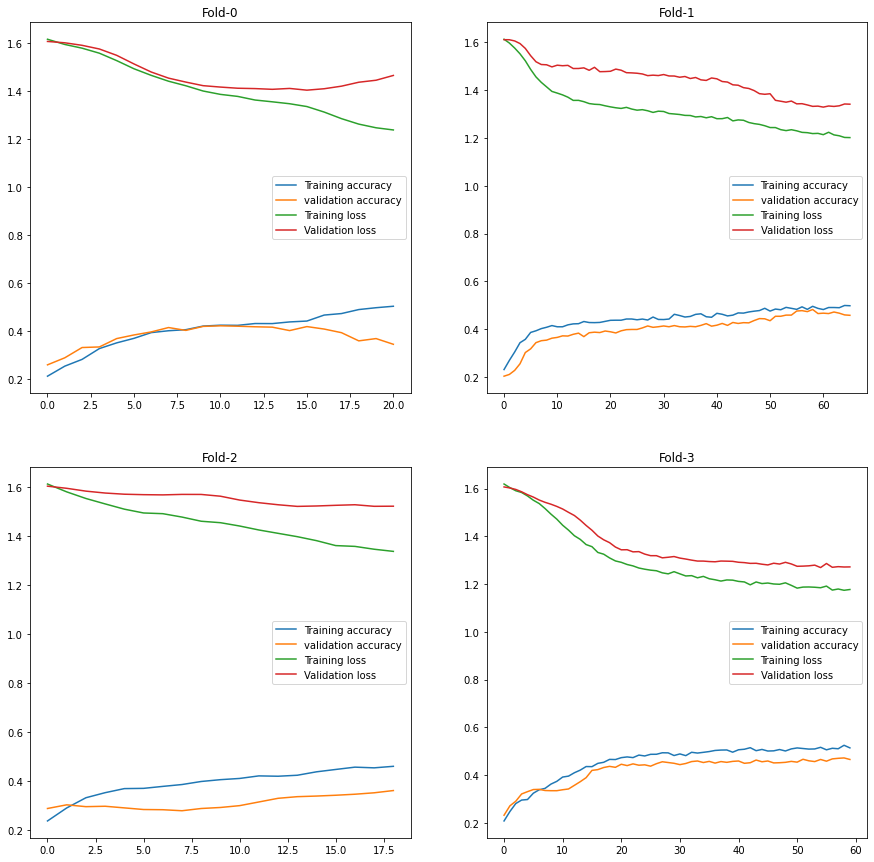

In [42]:
CLF_T.plots()

## Results for raw epochs of Distractor Stimuli using all 5-subject groups

In [43]:
clr_D_D = CLF_D.mean_std_results()
clr_D_D.to_latex('clr_D_D.tex')
clr_D_D

,AD,DLB,HC,PD,PDD,Dataset
f1-score,0.365 ( 0.2),0.286 ( 0.05),0.562 ( 0.15),0.223 ( 0.17),0.315 ( 0.21),Standard
precision,0.509 ( 0.32),0.366 ( 0.14),0.435 ( 0.14),0.303 ( 0.16),0.331 ( 0.2),Standard
recall,0.294 ( 0.16),0.271 ( 0.09),0.815 ( 0.16),0.187 ( 0.15),0.309 ( 0.22),Standard


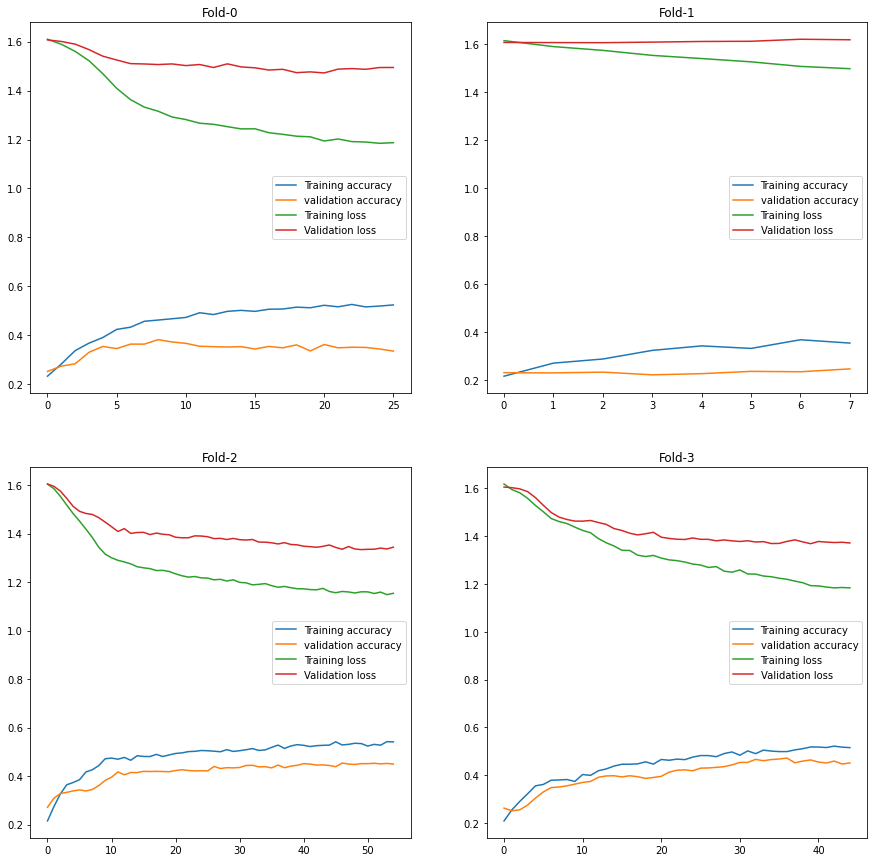

In [44]:
CLF_D.plots()

## Results for raw epochs of Standard Stimuli using DLB and HC subjects 

In [45]:
clr_S_DLB_HC = CLF_S_DLB_HC.mean_std_results()
clr_S_DLB_HC.to_latex('CLF_S_DLB_HC.tex')
clr_S_DLB_HC

,class1,HC,Accuracy,Macro avg,Weiwghted avg
f1-score,0.655 ( 0.14),0.803 ( 0.05),0.753 ( 0.07),0.729 ( 0.09),0.742 ( 0.08)
precision,0.779 ( 0.1),0.74 ( 0.06),0.753 ( 0.07),0.759 ( 0.08),0.757 ( 0.08)
recall,0.575 ( 0.16),0.88 ( 0.05),0.753 ( 0.07),0.727 ( 0.09),0.753 ( 0.07)


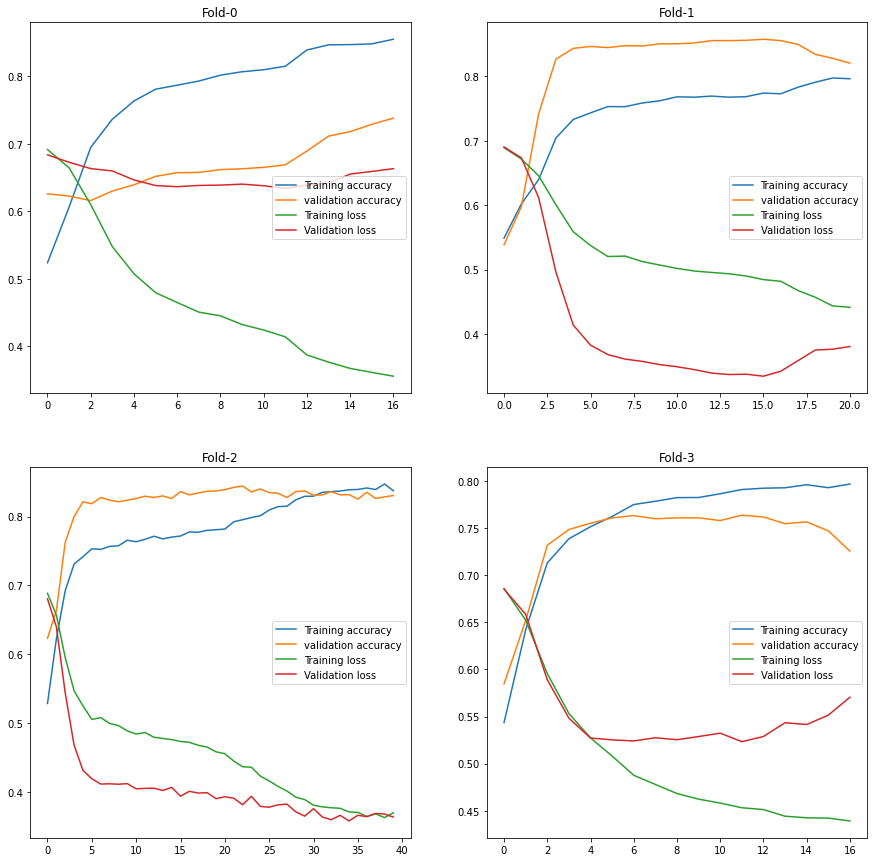

In [46]:
 CLF_S_DLB_HC.plots()

## Results for raw epochs of Standard Stimuli using PD and HC subjects 

In [47]:
clr_S_PD_HC = CLF_S_PD_HC.mean_std_results()
clr_S_PD_HC

,class1,HC,Accuracy,Macro avg,Weiwghted avg
f1-score,0.695 ( 0.08),0.839 ( 0.04),0.795 ( 0.04),0.767 ( 0.05),0.784 ( 0.05)
precision,0.879 ( 0.08),0.767 ( 0.05),0.795 ( 0.04),0.823 ( 0.04),0.816 ( 0.03)
recall,0.59 ( 0.13),0.93 ( 0.06),0.795 ( 0.04),0.76 ( 0.04),0.795 ( 0.04)


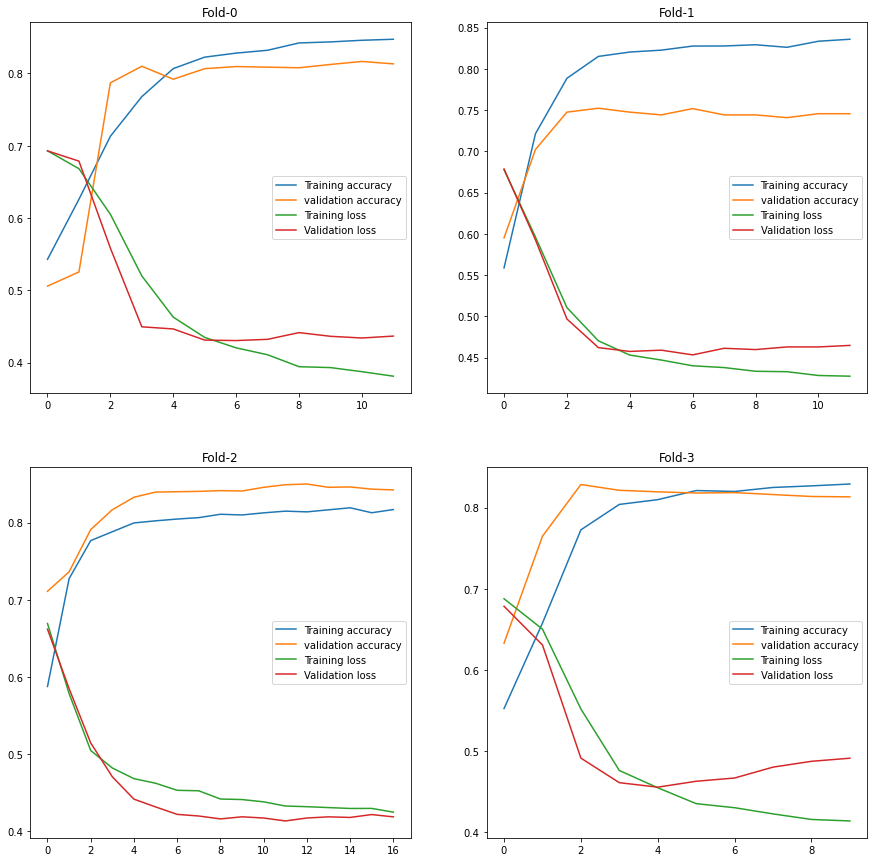

In [48]:
 CLF_S_PD_HC.plots()

## Preprocessing visualization

In [49]:
def preProcessingVisualization(raw_patient):
    raw =  mne.io.read_raw_eeglab(raw_patient)
    p1 = raw.plot()
    raw.filter(l_freq = 1.0, h_freq = None)
    raw.set_eeg_reference('average')
    new_ch_names = ['V-EOG',
                 'H-EOG',
                 'P3',
                 'Pz',
                 'P4',
                 'T7',
                 'T8',
                 'O1',
                 'Fp1',
                 'Fp2',
                 'F3',
                 'Fz',
                 'F4',
                 'C3',
                 'Cz',
                 'C4']

    old_ch_names = raw.ch_names
    if new_ch_names == old_ch_names:
        raw = raw
    else:
        mapping = {k: v for k, v in zip(old_ch_names, new_ch_names)}
        raw.rename_channels(mapping)

    #raw = raw.drop_channels(['T7', 'T8', 'O1', 'Fp1', 'Fp2'], on_missing = 'ignore')

    raw = raw.set_channel_types({'V-EOG': 'eog', 'H-EOG': 'eog'}, verbose=None)

    # Load the montage
    montage = mne.channels.make_standard_montage('standard_1020' )

    # Set the montage for the EEG data
    raw = raw.set_montage(montage)


    ## reapairing artifact with regression
    # Perform regression using the EOG channels/sensors as independent variable and the EEG
    # channels/sensors as dependent variables
    model_plain = EOGRegression(picks='eeg', exclude='bads', picks_artifact='eog', proj=True).fit(raw)
    raw_clean = model_plain.apply(raw)
    p2 = raw_clean.plot()
    
    
    # determine the number of independent components, choose method algorithm
    ica = ICA(n_components=None, method='picard',fit_params=dict(extended=True),
                          random_state=21, max_iter = 10000 )


    # Apply ICA 
    ica = ica.fit(raw_clean)
    bad_idxV, scoresV = ica.find_bads_eog(raw_clean, ch_name='V-EOG', threshold=2, start=None,
                                stop=None, l_freq=1, h_freq=60,reject_by_annotation=True, 
                                        measure='zscore', verbose=None)

    bad_idxH, scoresH = ica.find_bads_eog(raw_clean, ch_name='H-EOG', threshold=2, start=None,
                                stop=None, l_freq=1, h_freq=60,reject_by_annotation=True, 
                                        measure='zscore', verbose=None)
    #bad_idx, scores = ica.find_bads_eog(raw, 'V-EOG', threshold = 1)
    exclude = bad_idxV + bad_idxH
    ica.exclude = exclude
    raw_ica_clean = ica.apply(raw_clean)
    #raw_ica_clean.set_eeg_reference('average')
    
    p3 = raw_ica_clean.plot()
    
    events = mne.events_from_annotations(raw_ica_clean)
    events = events[0]
    event_ids = {'standard/stimulus': 1, 'reaction_time/stimulus': 2,'distractor/stimulus': 3, 
                 'target/stimulus': 4}

    # epoch the data based on the onset of the events 
    tmin = -0.1
    tmax = 2.0
    epochs = mne.Epochs(raw_ica_clean, events, event_id = event_ids, tmin = tmin, tmax = tmax, 
                        preload = True, on_missing='ignore', baseline = None)

    # Drop epochs based on the reject criteria
    reject = dict(eeg=120e-6) 
    epochs = epochs.drop_bad(reject=reject)
    epochs = epochs.resample(sfreq=128)
    p4 = epochs.plot()
    
    
    return p1, p2, p3, p4


In [50]:
%%capture 
p1, p2, p3, p4 = preProcessingVisualization(HC[0])

## Different stages for  EEG signal during preprocessing. 

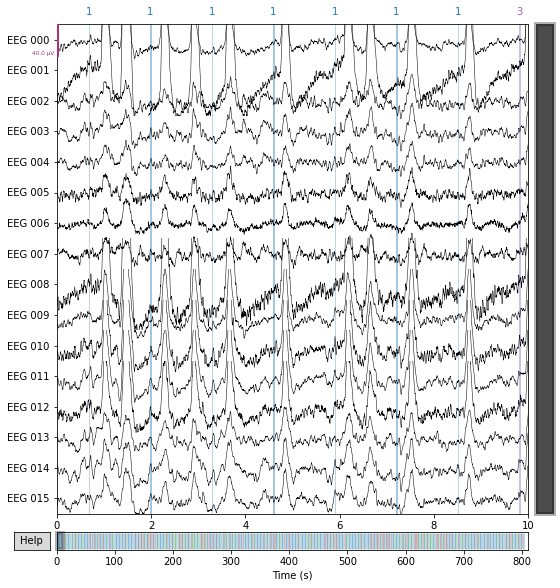

In [51]:
# Raw EEG signal
p1

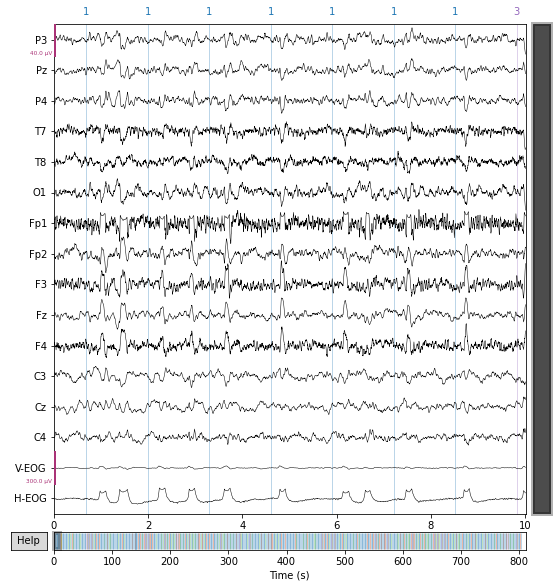

In [52]:
# EEG signal after filtering, re-referencing, and repairing with regression techniques.
p2

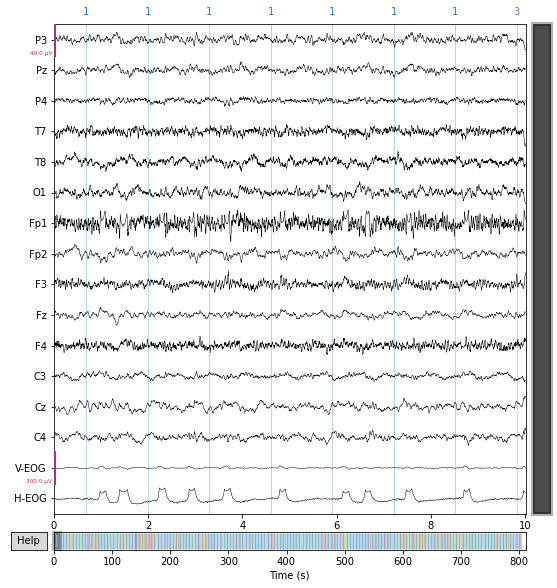

In [53]:
# EEG signal after stage 2 + further cleaning with ICA. 
p3

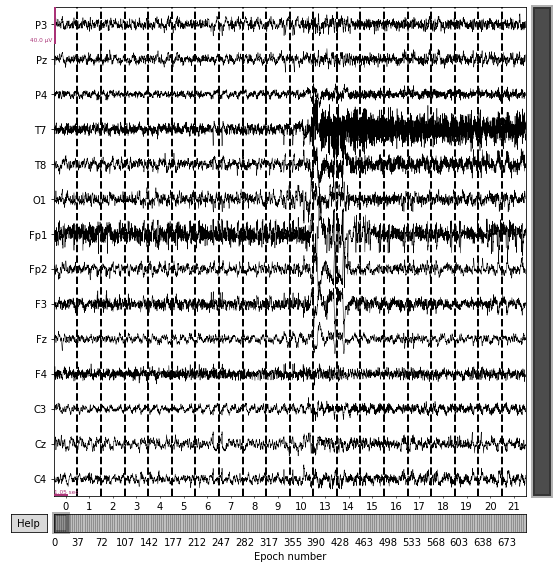

In [54]:
# Epoched EEG signal
p4